In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl
from loguru import logger
from polars import col as c

# Import the project's modules
from figure_manager import FigureManager, generate_plot

Set notebook parameters

In [2]:
PROJECT_ROOT = Path("../")
EXTERNAL_DATA_PATH: str = "data/"
FIGURES_PATH: str = Path("outputs/figures")
PAPER_SIZE: str = "A4"
FILE_EXT: str = ".pdf"
USE_LATEX: bool = False
VERBOSE: bool = True
LOG_DIR: str = Path("outputs/logs")

Specify log

In [3]:
logger.add(
    PROJECT_ROOT / LOG_DIR / "notebook_{time:YYYY-MM-DD_HH-mm}.log",
    level="DEBUG",
    retention=1,
)

1

Load data

In [4]:
# load data
data = pl.read_csv(PROJECT_ROOT / EXTERNAL_DATA_PATH / "Males.csv")

2025-04-01 14:43:35.888 | WARNING  | figure_manager.plotter:_print_verbose:13 -   Group (south) uses 1333 observations with fewest (2) at 'exper'=[15].
2025-04-01 14:43:35.890 | WARNING  | figure_manager.plotter:_print_verbose:13 -   Group (nothern_central) uses 964 observations with fewest (2) at 'exper'=[14].
2025-04-01 14:43:35.891 | WARNING  | figure_manager.plotter:_print_verbose:13 -   Group (rural_area) uses 85 observations with fewest (3) at 'exper'=[2, 12, 11].
2025-04-01 14:43:35.893 | WARNING  | figure_manager.plotter:_print_verbose:13 -   Group (north_east) uses 733 observations with fewest (1) at 'exper'=[0, 14].
2025-04-01 14:43:35.895 | WARNING  | figure_manager.plotter:_print_verbose:13 -   Group (None) uses 1245 observations with fewest (1) at 'exper'=[0].


<Axes: title={'center': 'Average Wage by Experience and Residence'}, xlabel='Experience', ylabel='Wage'>

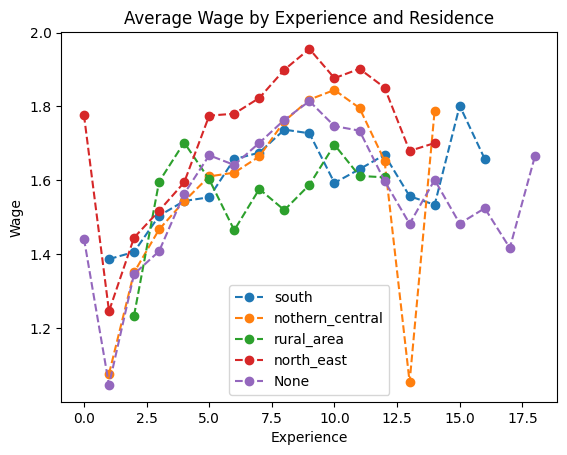

In [5]:
generate_plot(
    data,
    x="exper",
    y="wage",
    plot_type="plot",
    group_by="residence",
    agg_fct=pl.mean,
    xlabel="Experience",
    ylabel="Wage",
    title="Average Wage by Experience and Residence",
    plot_settings={"marker": "o", "linestyle": "--"},
    verbose=VERBOSE,
    sort_order=["south", "nothern_central", "rural_area", "north_east"],
)

2025-04-01 14:43:36.986 | SUCCESS  | figure_manager.figure_manager:save_figure:240 - Saved full figure to outputs\figures\one_big_plot.pdf
2025-04-01 14:43:37.084 | SUCCESS  | figure_manager.figure_manager:_save_subplot:164 - Saved subplot to outputs\figures\one_big_plot_subplot_1.pdf


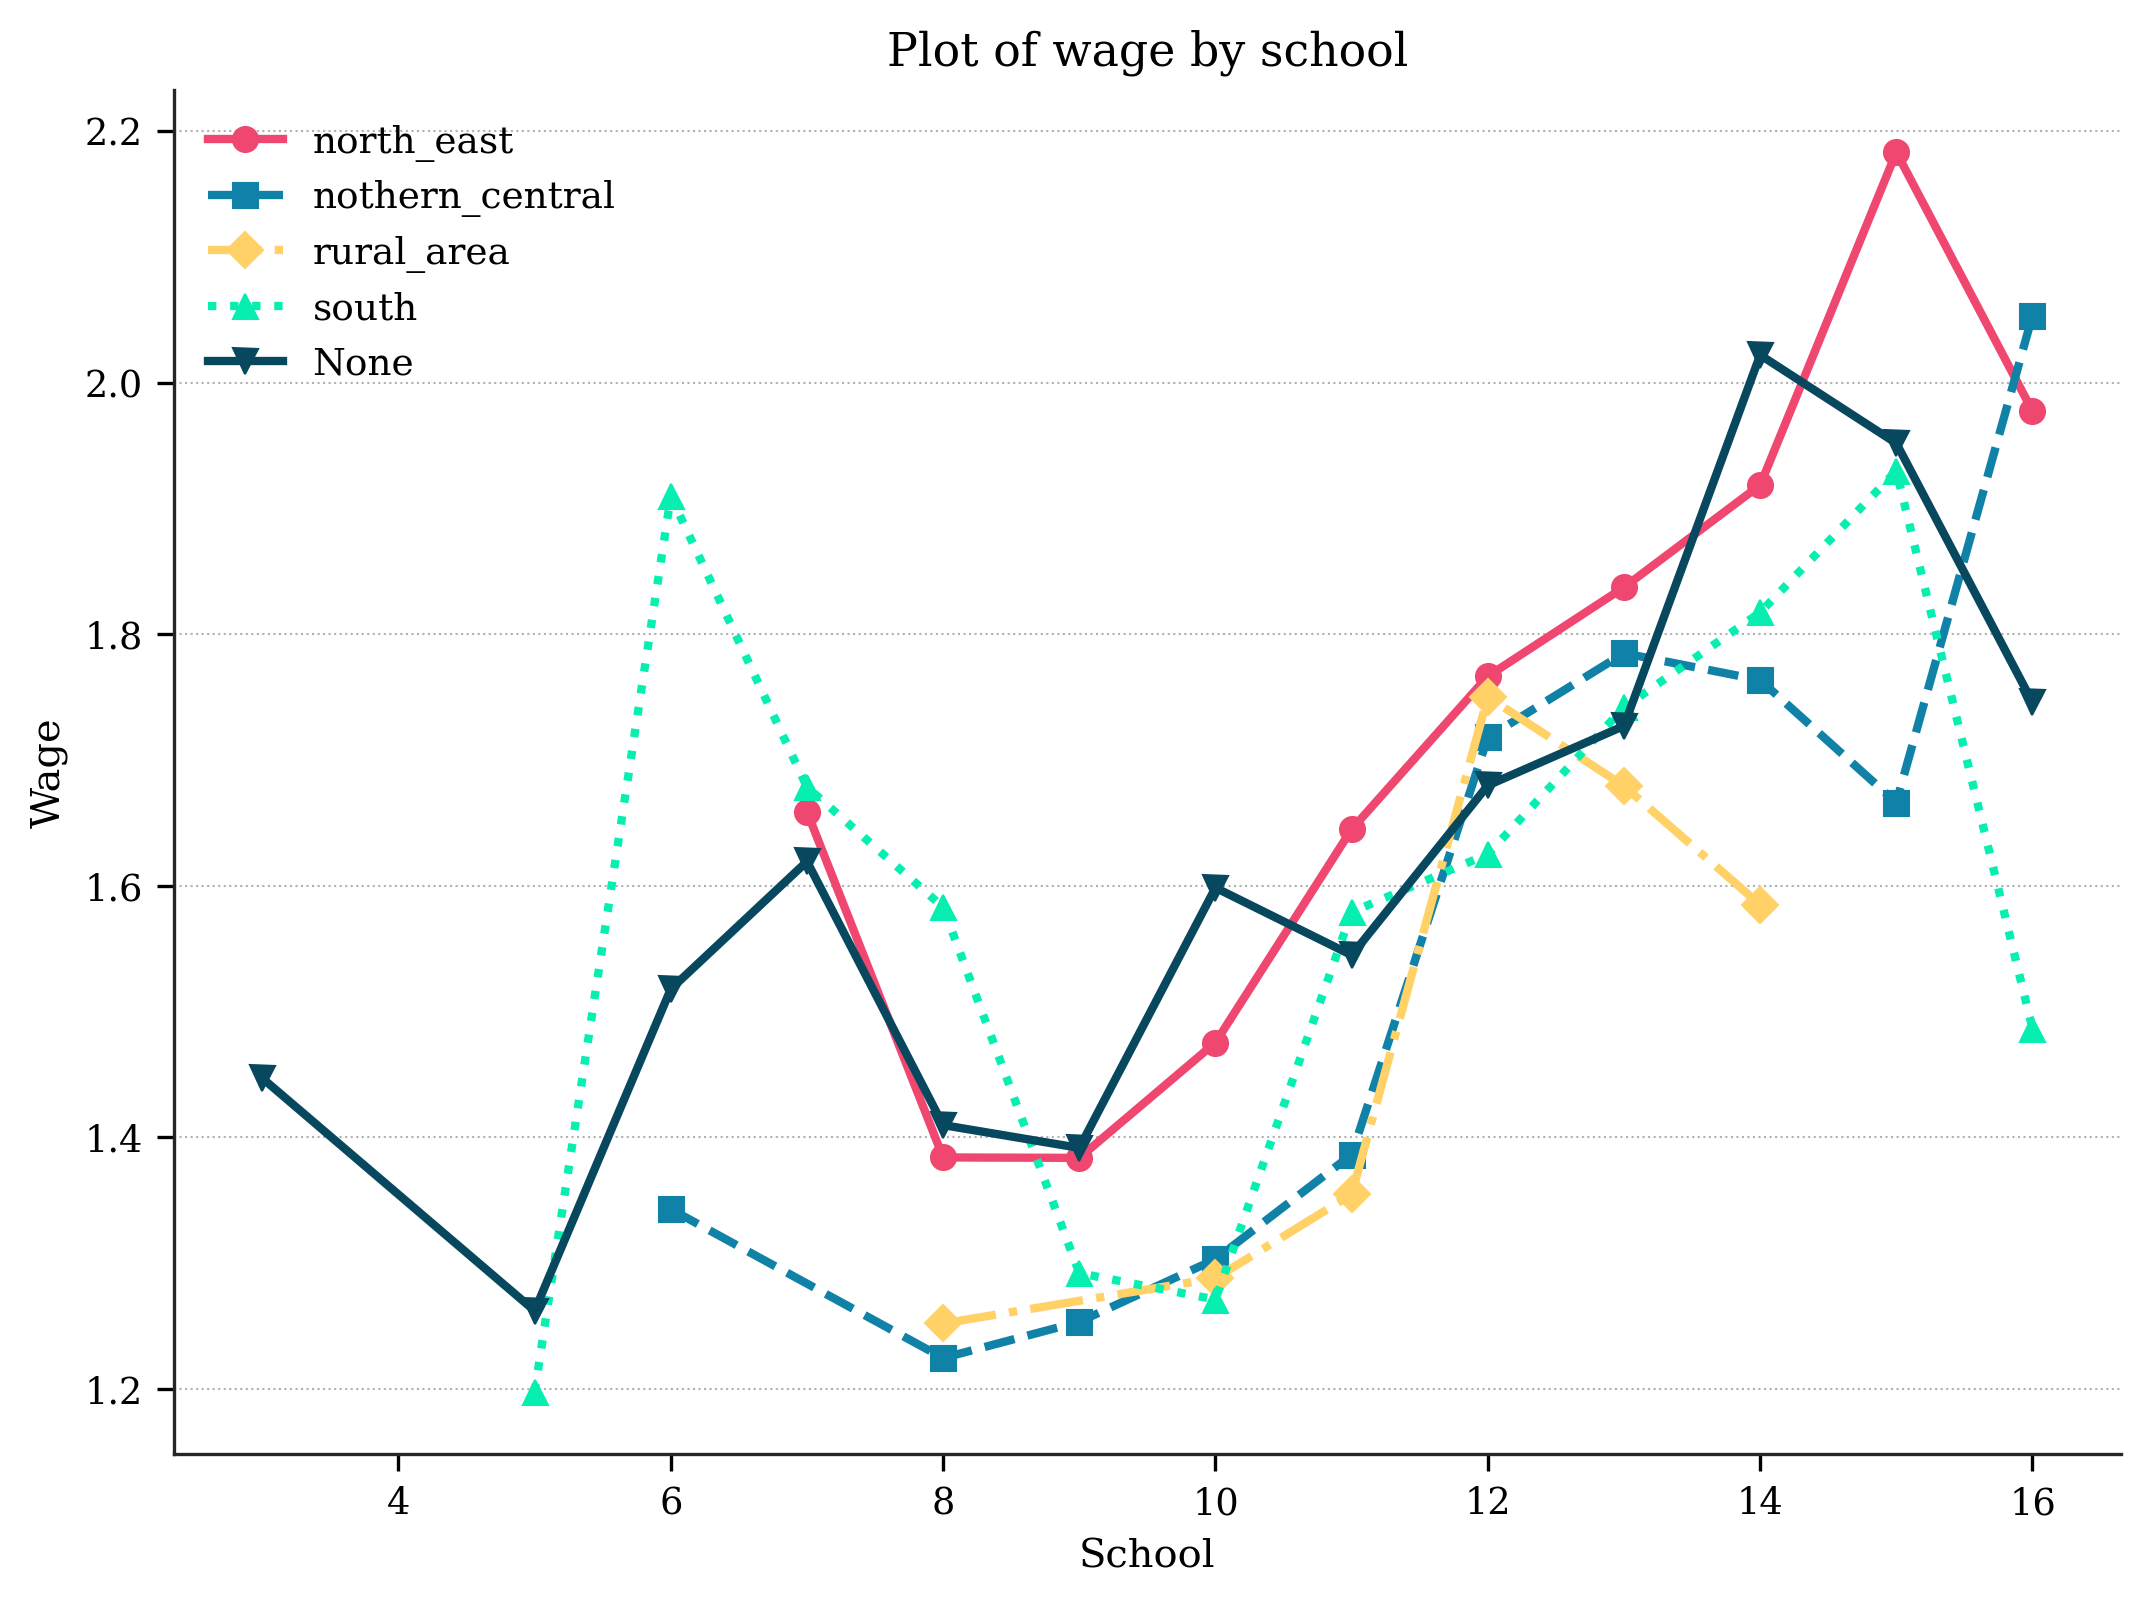

In [6]:
# Set up the FigureManager
fm = FigureManager(
    output_dir=FIGURES_PATH,
    paper_size=PAPER_SIZE,
    file_ext=FILE_EXT,
    use_latex=USE_LATEX,
)

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=1, n_cols=1, n_subplots=1)

axes[0] = generate_plot(
    data,
    x="school",
    y="wage",
    plot_type="plot",
    group_by="residence",
    agg_fct=pl.mean,
    ax=axes[0],
    verbose=False,
    # title='Average Wage by School and Residence'
)

fm.save_figure(filename="one_big_plot")

2025-04-01 14:43:37.573 | INFO     | figure_manager.plotter:_print_verbose:15 -   Group (north_east) uses 733 observations with fewest (8) at 'school'=[7].
2025-04-01 14:43:37.574 | WARNING  | figure_manager.plotter:_print_verbose:13 -   Group (nothern_central) uses 964 observations with fewest (1) at 'school'=[6].
2025-04-01 14:43:37.576 | WARNING  | figure_manager.plotter:_print_verbose:13 -   Group (rural_area) uses 85 observations with fewest (1) at 'school'=[8].
2025-04-01 14:43:37.577 | WARNING  | figure_manager.plotter:_print_verbose:13 -   Group (south) uses 1333 observations with fewest (3) at 'school'=[5, 7].
2025-04-01 14:43:37.578 | WARNING  | figure_manager.plotter:_print_verbose:13 -   Group (None) uses 1245 observations with fewest (5) at 'school'=[7].
2025-04-01 14:43:37.587 | WARNING  | figure_manager.plotter:_print_verbose:13 -   Group (north_east) uses 733 observations with fewest (1) at 'exper'=[0, 14].
2025-04-01 14:43:37.588 | WARNING  | figure_manager.plotter:_pr

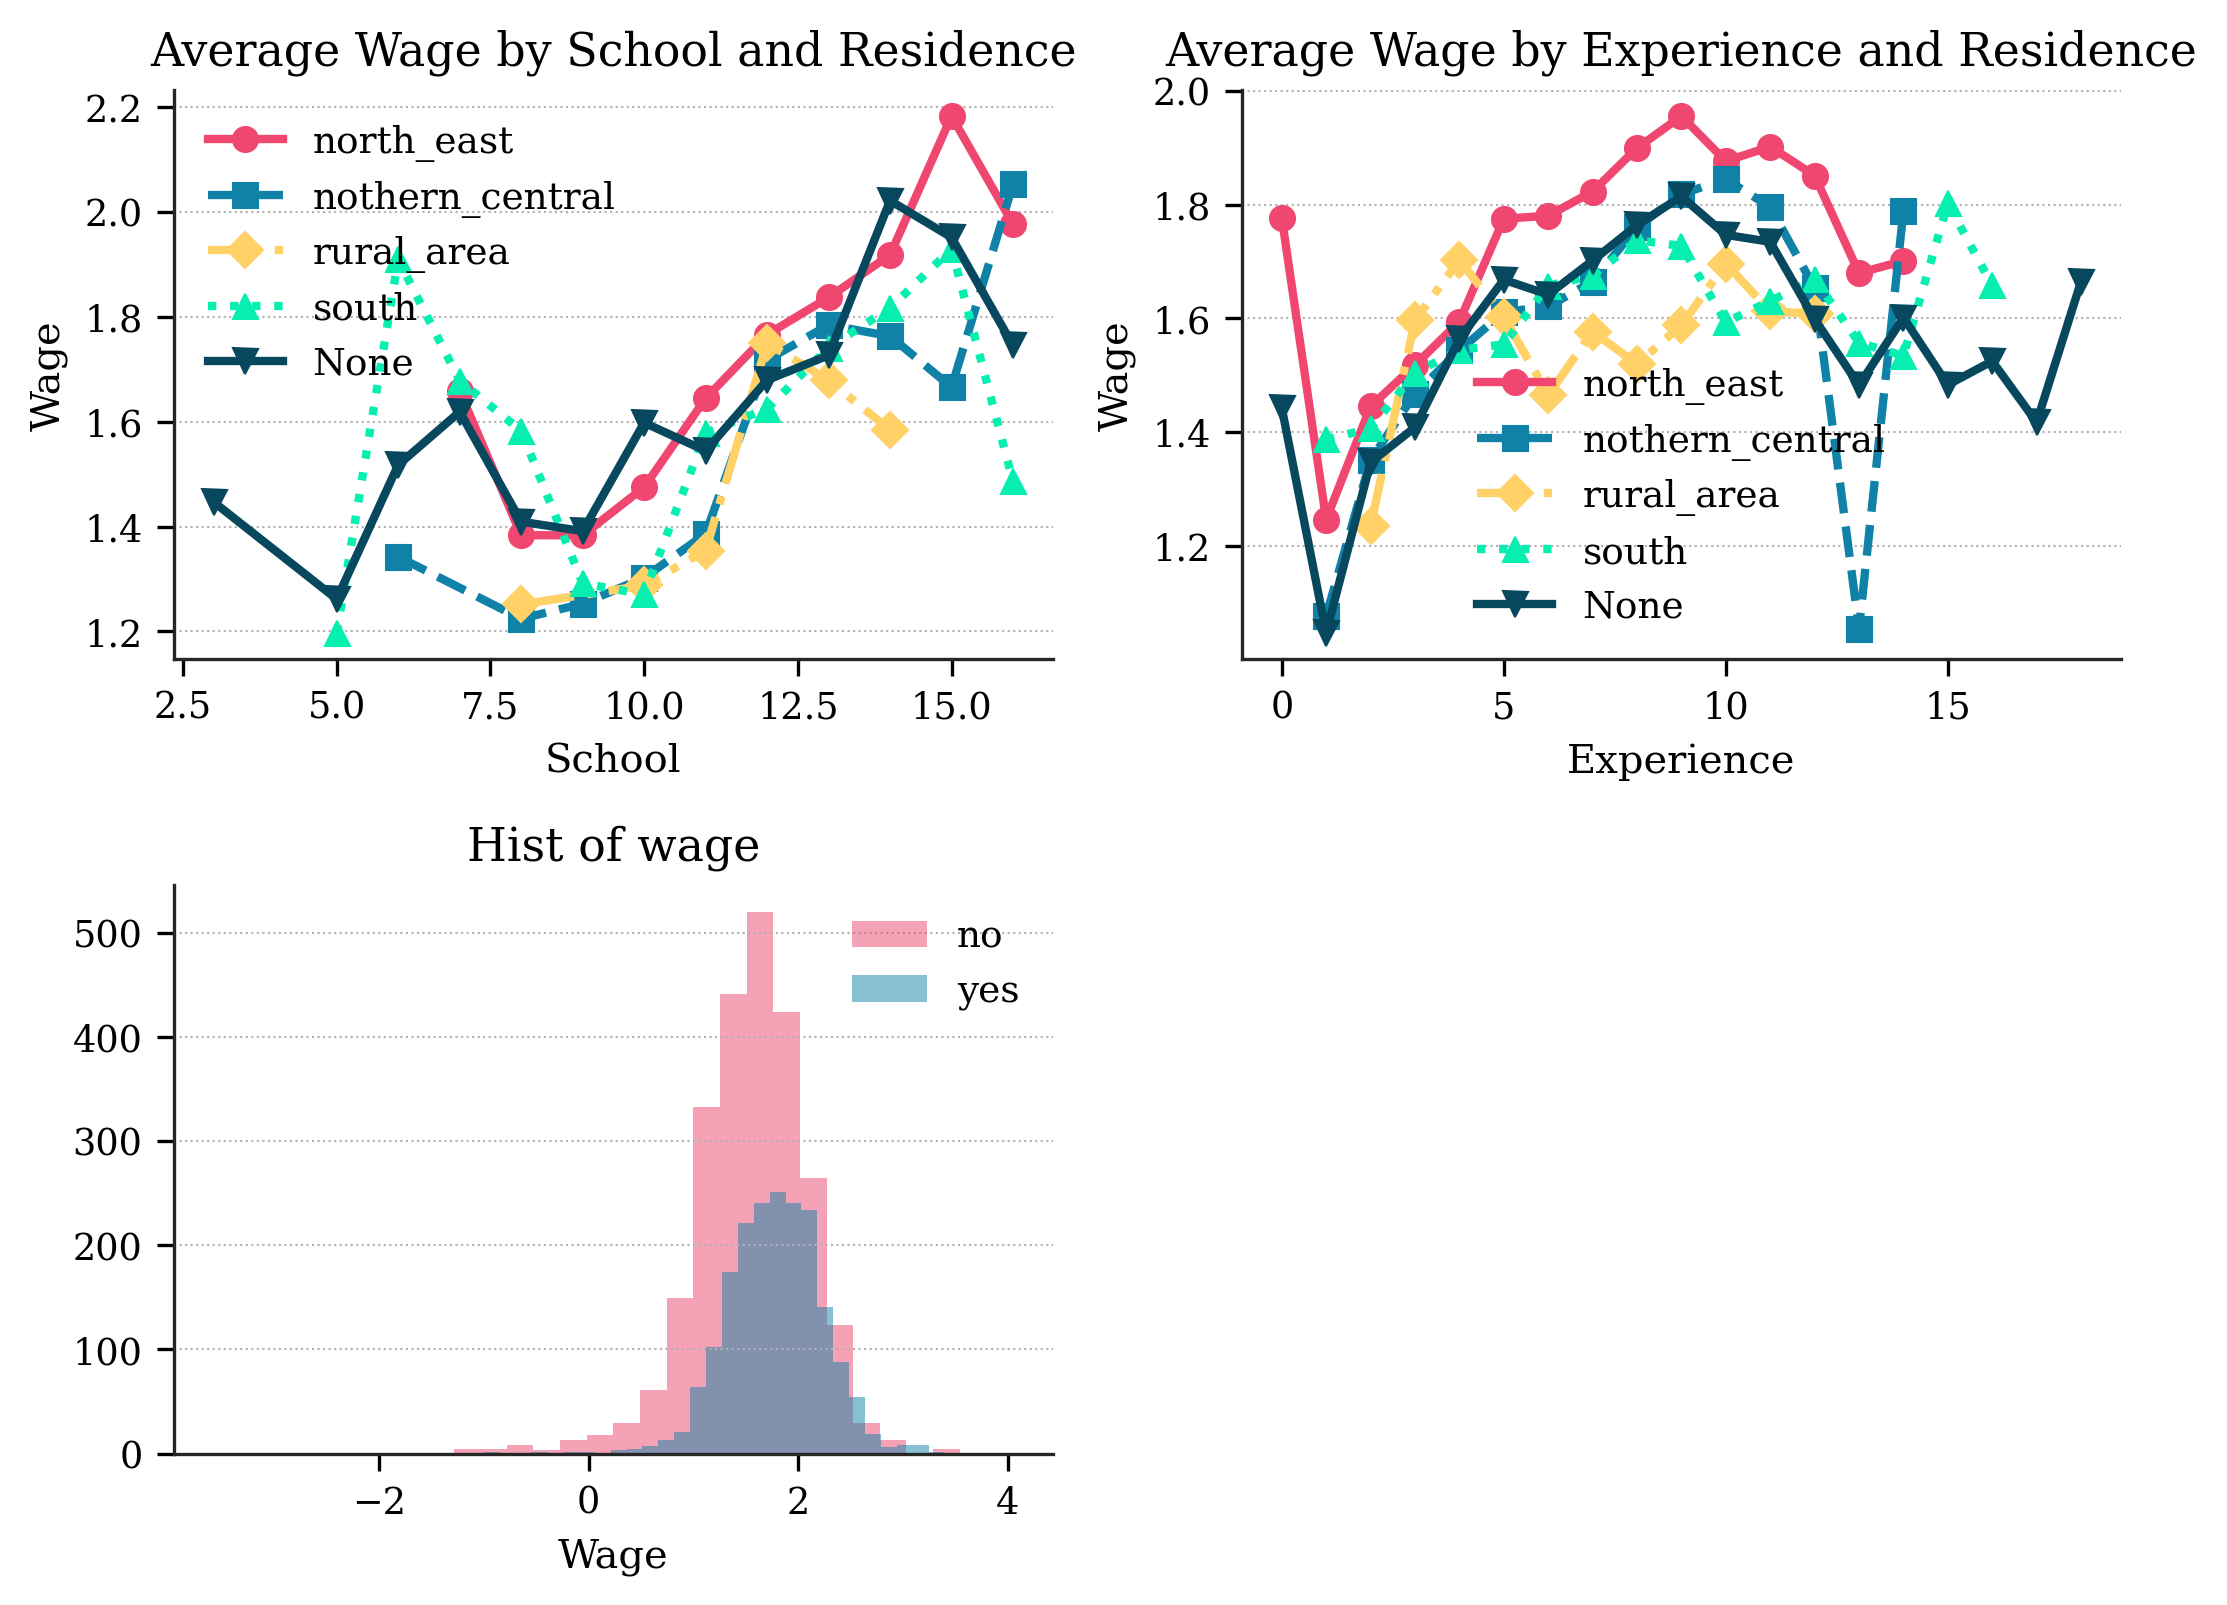

In [7]:
# Set up the FigureManager
fm = FigureManager(
    output_dir=FIGURES_PATH,
    paper_size=PAPER_SIZE,
    file_ext=FILE_EXT,
    use_latex=USE_LATEX,
)

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=2, n_cols=2, n_subplots=3)

axes[0] = generate_plot(
    data,
    x="school",
    y="wage",
    plot_type="plot",
    x_bins=5,
    group_by="residence",
    agg_fct=pl.mean,
    ax=axes[0],
    verbose=VERBOSE,
    xlabel="School",
    ylabel="Wage",
    title="Average Wage by School and Residence",
)
axes[1] = generate_plot(
    data,
    x="exper",
    y="wage",
    plot_type="plot",
    x_bins=5,
    group_by="residence",
    agg_fct=pl.mean,
    ax=axes[1],
    verbose=VERBOSE,
    xlabel="Experience",
    ylabel="Wage",
    title="Average Wage by Experience and Residence",
)
axes[2] = generate_plot(
    data,
    x="wage",
    bins=30,
    plot_type="hist",
    group_by="maried",
    ax=axes[2],
    verbose=VERBOSE,
    plot_settings={"alpha": 0.5},
)

# Save the entire figure and subplots
fm.save_figure(filename="three_small_plots")

# Optional: Display the figure
plt.show()

## Standard errors

2025-04-01 14:43:39.164 | SUCCESS  | figure_manager.figure_manager:save_figure:240 - Saved full figure to outputs\figures\std_err_plots.pdf
2025-04-01 14:43:39.280 | SUCCESS  | figure_manager.figure_manager:_save_subplot:164 - Saved subplot to outputs\figures\std_err_plots_subplot_1.pdf
2025-04-01 14:43:39.398 | SUCCESS  | figure_manager.figure_manager:_save_subplot:164 - Saved subplot to outputs\figures\std_err_plots_subplot_2.pdf


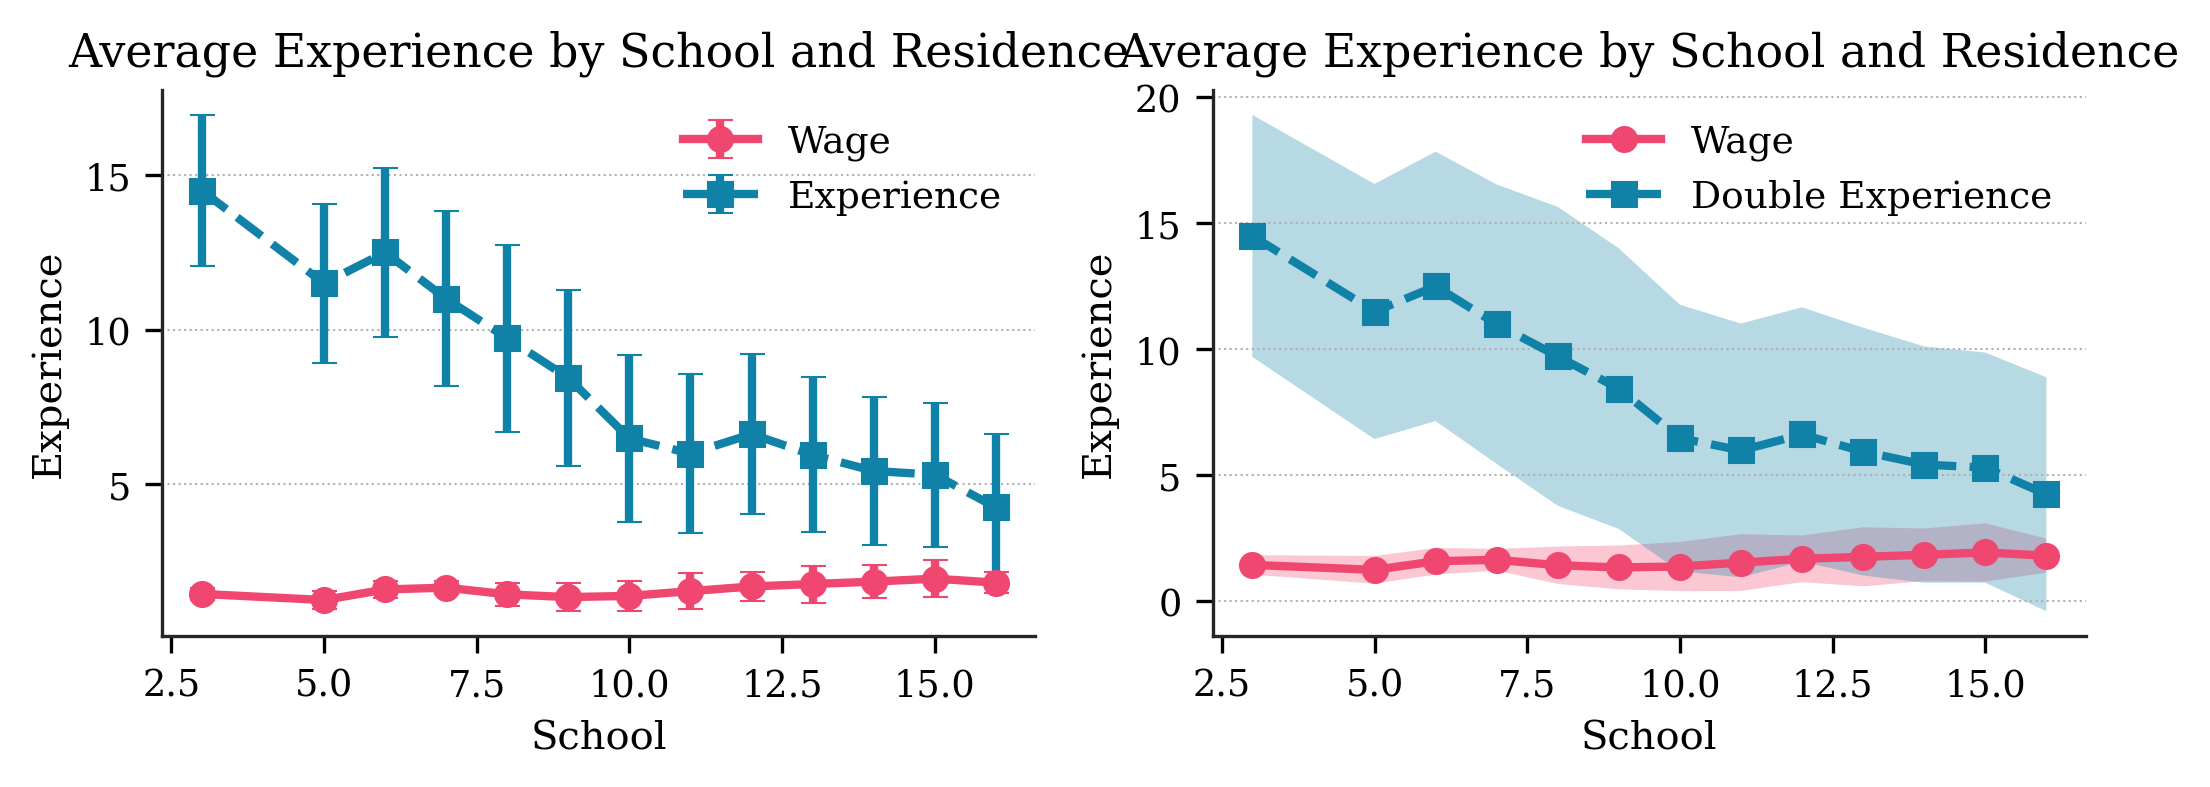

In [8]:
# Set up the FigureManager
fm = FigureManager(
    output_dir=FIGURES_PATH,
    paper_size=PAPER_SIZE,
    file_ext=FILE_EXT,
    use_latex=USE_LATEX,
)


cd = (
    data.group_by("school")
    .agg(
        pl.mean("wage").alias("wage_mean"),
        pl.std("wage").alias("wage_std"),
        pl.mean("exper").alias("exper_mean"),
        pl.std("exper").alias("exper_std"),
    )
    .with_columns(
        (c.wage_mean - c.wage_std * 1.96).alias("wage_ci_low"),
        (c.wage_mean + c.wage_std * 1.96).alias("wage_ci_high"),
        (c.exper_mean - c.exper_std * 1.96).alias("exper_ci_low"),
        (c.exper_mean + c.exper_std * 1.96).alias("exper_ci_high"),
    )
    .sort("school")
)

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=1, n_cols=2, n_subplots=2)

axes[0] = generate_plot(
    data=cd,
    x="school",
    y="wage_mean",
    y_err="wage_std",
    ax=axes[0],
    xlabel="School",
    ylabel="Wage",
    title="Average Wage by School and Residence",
    label="Wage",
)
axes[0] = generate_plot(
    data=cd,
    x="school",
    y="exper_mean",
    y_err="exper_std",
    ax=axes[0],
    xlabel="School",
    ylabel="Experience",
    title="Average Experience by School and Residence",
    label="Experience",
)
axes[1] = generate_plot(
    data=cd,
    x="school",
    y="wage_mean",
    y_err=("wage_ci_low", "wage_ci_high"),
    ax=axes[1],
    xlabel="School",
    ylabel="Wage",
    title="Average Wage by School and Residence",
    label="Wage",
)
axes[1] = generate_plot(
    data=cd,
    x="school",
    y="exper_mean",
    y_err=("exper_ci_low", "exper_ci_high"),
    ax=axes[1],
    xlabel="School",
    ylabel="Experience",
    title="Average Experience by School and Residence",
    label="Double Experience",
)

fm.save_figure(filename="std_err_plots")